# 音声波形の可視化
音声の波形（Waveform）を可視化する

サンプリングレート（1秒あたりのデータ数）を表示
Sampling Rate: 22050 Hz

音声の振幅を表す配列
Audio Data Shape: (117601,)


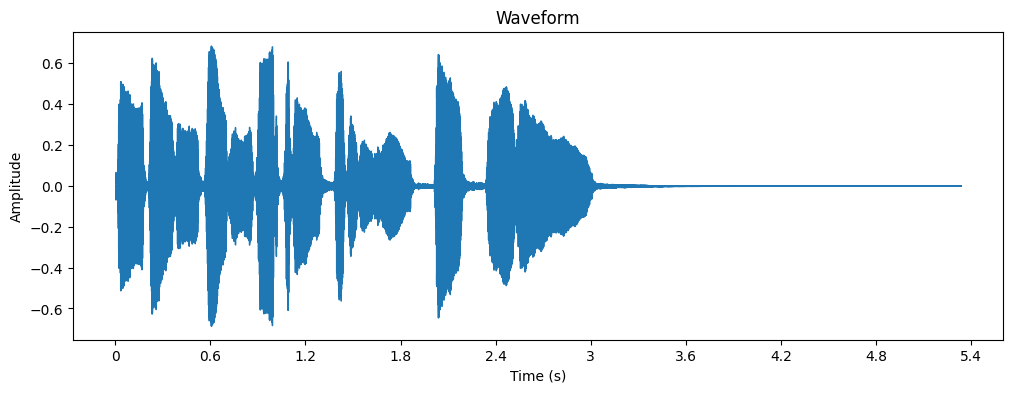

In [7]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# librosa のサンプル音声（トランペットの音）
file_path = librosa.example('trumpet')  

# 音声データの読み込み
y, sr = librosa.load(file_path, sr=None)

# サンプリングレート（1秒あたりのデータ数）を表示
print(f"サンプリングレート（1秒あたりのデータ数）を表示")
print(f"Sampling Rate: {sr} Hz")
print(f"")
print(f"音声の振幅を表す配列")
print(f"Audio Data Shape: {y.shape}")

# 音声波形の可視化
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

### ここで確認できること
- 時間（X軸）：音声の長さ（秒）
- 振幅（Y軸）：音の大きさ（音圧）

# スペクトログラムの可視化

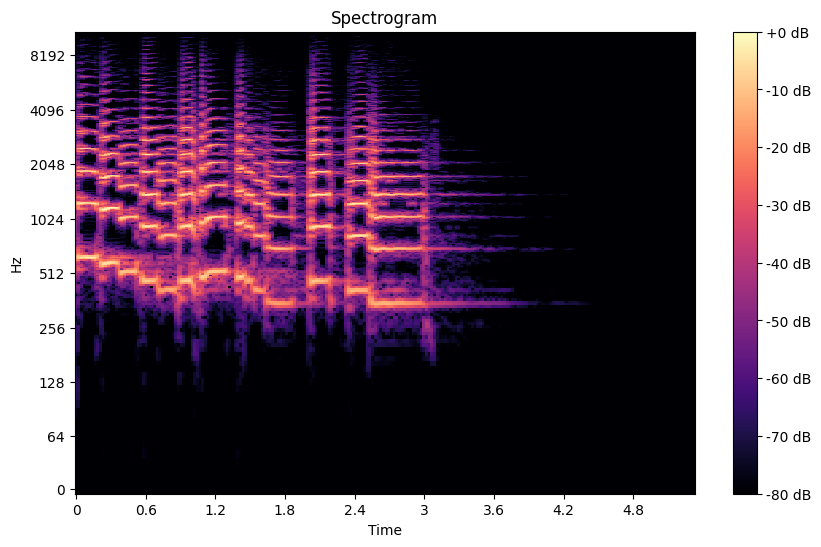

In [8]:
# 短時間フーリエ変換（STFT）
D = np.abs(librosa.stft(y))

# スペクトログラムの描画
plt.figure(figsize=(10, 6))
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), sr=sr, x_axis="time", y_axis="log")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram")
plt.show()

### ここで確認できること
- X軸：時間
- Y軸：周波数（Hz）
- 色の濃さ：音の強さ（dB）

# メル周波数スペクトログラム

#### メルスペクトログラムとは？
低い周波数の変化を細かく、高い周波数の変化を粗く することで、人間の耳に近い感覚で分析できる。

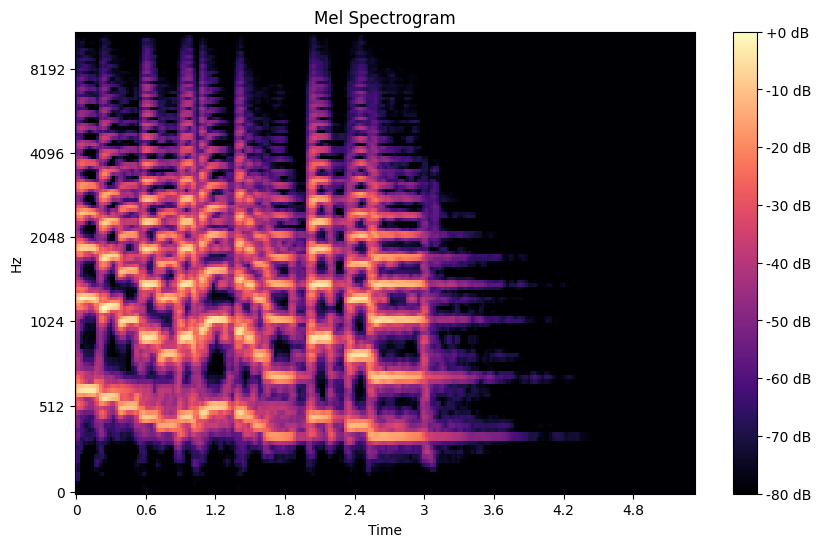

In [9]:
# メル周波数スペクトログラム
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)

plt.figure(figsize=(10, 6))
librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max), sr=sr, x_axis="time", y_axis="mel")
plt.colorbar(format="%+2.0f dB")
plt.title("Mel Spectrogram")
plt.show()


In [10]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# librosa のサンプル音声（トランペット）
file_path = librosa.example('trumpet')  

# 音声データの読み込み
y, sr = librosa.load(file_path, sr=None)

# サンプリングレート（1秒あたりのデータ数）を表示
print(f"Sampling Rate: {sr} Hz")
print(f"Audio Data Shape: {y.shape}")

Sampling Rate: 22050 Hz
Audio Data Shape: (117601,)


## 7-1. MFCC(メル周波数ケプストラム係数) の取得
MFCC（Mel-Frequency Cepstral Coefficients）は、音声認識でよく使われる特徴量です。

#### MFCCとは？
- 人間の耳が感じる周波数の変化に近い特徴を抽出する。
- 音声認識・スピーカー認識・感情分析などに活用される。

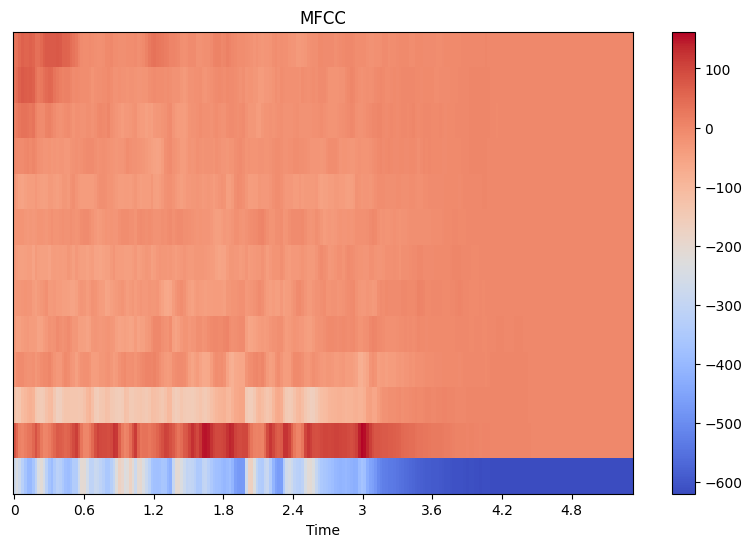

In [12]:
# MFCC の計算
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# MFCC の可視化
plt.figure(figsize=(10, 6))
librosa.display.specshow(mfccs, x_axis="time")
plt.colorbar()
plt.title("MFCC")
plt.show()


## 7-2. ゼロ交差率（Zero Crossing Rate）の計算
ゼロ交差率は、波形がゼロを通過する回数 を測る指標です。

#### ゼロ交差率とは？
パーカッション音やノイズの検出に使われる
- 高い値 → ノイズやリズムのある音
- 低い値 → 継続的な音（ボーカルなど）

In [13]:
# ゼロ交差率を計算
zero_crossings = librosa.zero_crossings(y, pad=False)
print(f"Zero Crossing Rate: {sum(zero_crossings)}")

Zero Crossing Rate: 20615


## 7-3. スペクトルセントロイド（Spectral Centroid）の計算

#### スペクトルセントロイドとは？
- 高音が多い音 → 高い値
- 低音が多い音 → 低い値
- 楽器ごとの音色解析や感情分類に使われる

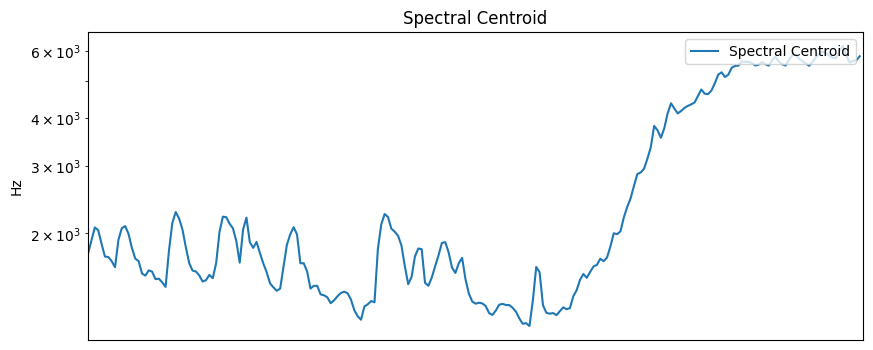

In [14]:
# スペクトルセントロイドの計算
spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]

# スペクトルセントロイドの可視化
plt.figure(figsize=(10, 4))
plt.semilogy(spectral_centroids, label="Spectral Centroid")
plt.ylabel("Hz")
plt.xticks([])
plt.xlim([0, len(spectral_centroids)])
plt.legend(loc="upper right")
plt.title("Spectral Centroid")
plt.show()

## 7-4. RMSエネルギー（音量の強さ）
#### 音量の変化を見る指標

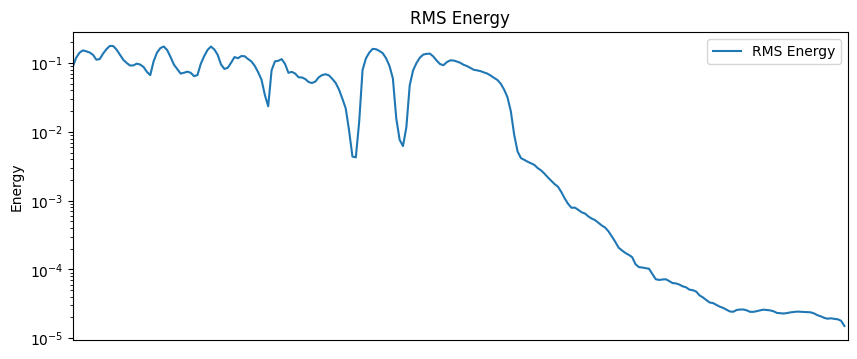

In [16]:
rms = librosa.feature.rms(y=y)
plt.figure(figsize=(10, 4))
plt.semilogy(rms[0], label="RMS Energy")
plt.ylabel("Energy")
plt.xticks([])
plt.xlim([0, len(rms[0])])
plt.legend(loc="upper right")
plt.title("RMS Energy")
plt.show()

## 7-5. スペクトルバンド幅
#### 音の広がり（明るい or こもった音）を測る指標

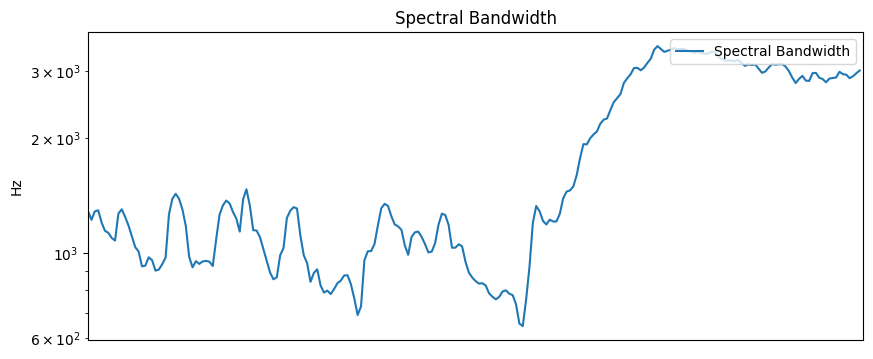

In [18]:
spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)[0]
plt.figure(figsize=(10, 4))
plt.semilogy(spectral_bandwidth, label="Spectral Bandwidth")
plt.ylabel("Hz")
plt.xticks([])
plt.xlim([0, len(spectral_bandwidth)])
plt.legend(loc="upper right")
plt.title("Spectral Bandwidth")
plt.show()